In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
ds = pd.read_csv('D:\kaggle\Bengaluru_House_Data.csv')
ds.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
ds.shape

(13320, 9)

In [4]:
ds.groupby('area_type').agg('count')

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [5]:
ds_drop1 = ds.drop(['availability','balcony','society','area_type'] , axis = 1) 


In [6]:
ds_drop1.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
ds_drop1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
ds2 = ds_drop1.dropna()

In [9]:
ds2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
ds2['bhk'] = ds2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\jaibh\AppData\Local\Temp\ipykernel_10312\1862127888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds2['bhk'] = ds2['size'].apply(lambda x: int(x.split(' ')[0]))


In [11]:
ds2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
ds2['bhk'].unique()


array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
def tryfloat(x):
    try:
        float(x)
    except:
        return False
    
    return True
    

In [14]:
 ds3 = ds2[~ds2['total_sqft'].apply(tryfloat)]

In [15]:
ds3.head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [16]:
def conv_avg(x):
    num = x.split('-')
    if len(num) == 2:
        return (float(num[0]) + float(num[1])) / 2
    try:
        return float(x)
    except:
        return None


In [17]:
ds4 = ds2.copy()


In [18]:
ds4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [19]:
ds4['total_sqft'] = ds4['total_sqft'].apply(conv_avg)

In [20]:
ds4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [21]:
ds4['price_per_sqft'] = ds4['price']/ds4['total_sqft']*100000

In [22]:
ds5 = ds4.copy()

In [23]:
len(ds5['location'].unique())

1304

In [24]:
location_stats = ds5.groupby('location')['location'].agg('count')
location_stats.head(20)

location
 Anekal                                             1
 Banaswadi                                          1
 Basavangudi                                        1
 Bhoganhalli                                        1
 Devarabeesana Halli                                6
 Devarachikkanahalli                               14
 Electronic City                                    2
 Mysore Highway                                     4
 Rachenahalli                                       2
 Sector 1 HSR Layout                                1
 Thanisandra                                        3
 Whitefield                                         1
 ittamadu                                           1
 south                                              2
1 Annasandrapalya                                   1
1 Giri Nagar                                        1
1 Immadihalli                                       1
1 Ramamurthy Nagar                                  1
12th cross srinivas

In [25]:
y = location_stats.sort_values(ascending = False)
y

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [26]:
len(location_stats[location_stats<=10])

1063

In [27]:
location_less_10 = location_stats[location_stats<=10]
# len(ds5.location.unique())

In [28]:
ds5['location'] = ds5['location'].apply(lambda x: 'other' if  x in location_less_10 else x)

In [29]:
ds5['location'].head()
len(ds5.location.unique())

242

outlier detection

In [30]:
len(ds5[ds5.total_sqft/ds5.bhk<300])

744

In [31]:
ds6 = ds5[~(ds5.total_sqft/ds5.bhk<300)]

In [32]:
ds6.describe()
ds6.shape

(12502, 7)

In [33]:
# assuming normal distribution and 68% of data in mean+- standard deviation

In [34]:
def remove_outliers(ds):
    ds_cleaned = pd.DataFrame()
    for i,subdf in ds.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        stand = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-stand)) & (subdf.price_per_sqft<=(m+stand))]
        ds_cleaned = pd.concat([reduced_df,ds_cleaned],ignore_index= True)
    
    return ds_cleaned

    

In [35]:
ds7 = remove_outliers(ds6)


In [36]:
ds7.shape


(10244, 7)

In [37]:
#checking if property price for same bhk is same or not

In [38]:
def check_price(df,locate):
    bhk2 = df[(df.location==locate) & (df.bhk==2)]
    bhk3 = df[(df.location==locate) & (df.bhk==3)]
#     matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft , color = 'blue',label = '2bhk' , s = 50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft , color = 'red',label = '3bhk' , s = 50 , marker = '+')
    plt.xlabel('total_sqft')
    plt.ylabel('price')
    plt.title(locate)
    plt.legend()

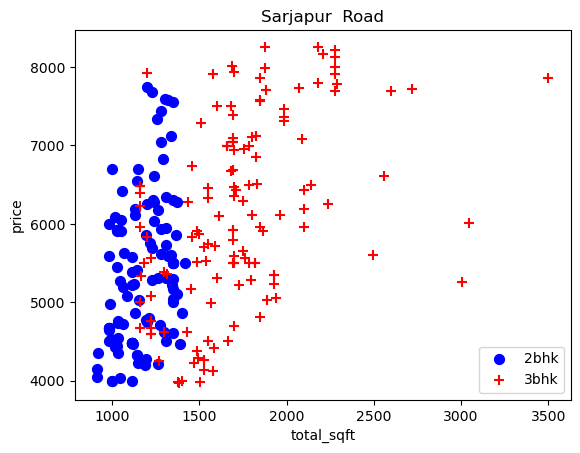

In [39]:
check_price(ds7,'Sarjapur  Road') # 2bhk should be lower in price 

In [40]:

def remove_bhk_outliers(df):
    exclude_indices = np.array([])  
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1) 
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')  # Changed 'axis' to 'index'


In [41]:
ds8 = remove_bhk_outliers(ds7)

In [42]:
ds8.shape

(7342, 7)

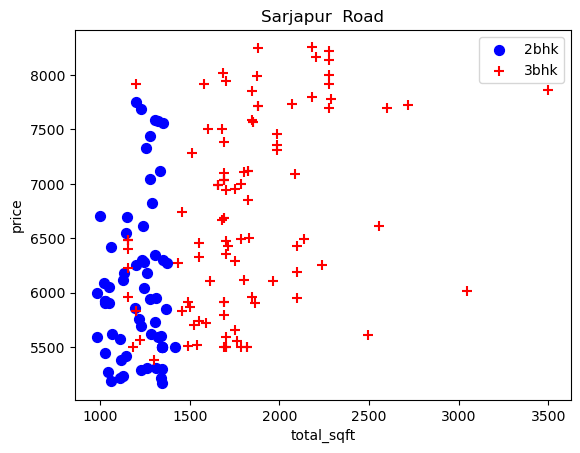

In [43]:
check_price(ds8,'Sarjapur  Road')

In [44]:
ds8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,other,3 BHK,2770.0,4.0,290.00,3,10469.314079
2,other,1 RK,510.0,1.0,25.25,1,4950.980392
4,other,1 BHK,600.0,1.0,38.00,1,6333.333333
7,other,2 BHK,1500.0,2.0,185.00,2,12333.333333
8,other,2 BHK,840.0,2.0,45.00,2,5357.142857


Text(0, 0.5, 'count')

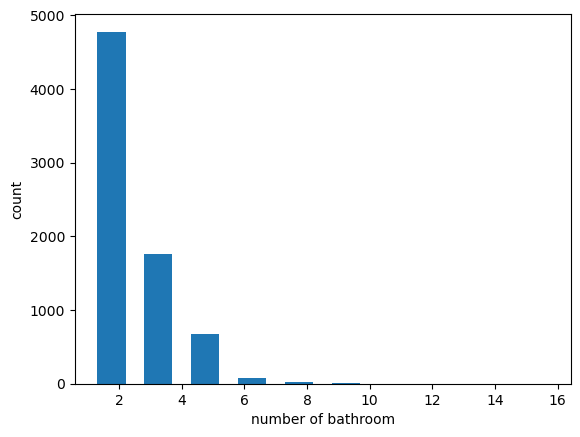

In [45]:
plt.hist(ds8.bath,rwidth = 0.6)
plt.xlabel('number of bathroom')
plt.ylabel('count')

In [46]:
#bathroom greater than bhk +2 then it is a outlier
ds8[ds8.bath>ds8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
475,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
3671,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
5011,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
8604,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520


In [47]:
ds9 = ds8[ds8.bath<ds8.bhk+2]
ds9.shape

(7264, 7)

In [48]:
ds9 = ds8.drop(['price_per_sqft' ,'size'],axis = 1)

In [49]:
ds9.head()

,location,total_sqft,bath,price,bhk
0,other,2770.0,4.0,290.00,3
2,other,510.0,1.0,25.25,1
4,other,600.0,1.0,38.00,1
7,other,1500.0,2.0,185.00,2
8,other,840.0,2.0,45.00,2


In [50]:
dummy = pd.get_dummies(ds9.location)
dummy = dummy.drop(['other'],axis = 1)

In [51]:
ds10 = pd.concat([ds9,dummy],axis = 1) #axis 1 column
ds11 = ds10.drop(['location'],axis = 1)

In [52]:
ds11.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2770.0,4.0,290.00,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,510.0,1.0,25.25,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,600.0,1.0,38.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1500.0,2.0,185.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,840.0,2.0,45.00,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


START OF MODEL 


In [53]:
x = ds11.drop(['price'],axis = 1)
x.head(3)

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2770.0,4.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,510.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,600.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
y = ds11['price']
y.head(3)

0    290.00
2     25.25
4     38.00
Name: price, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size = 0.2,random_state = 1)

In [56]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5873 entries, 518 to 7575
Columns: 244 entries, total_sqft to Yeshwanthpur
dtypes: float64(2), int64(1), uint8(241)
memory usage: 1.5 MB


In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test)

0.8411072474448301

In [60]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2 ,random_state = 0)

cross_val_score(LinearRegression(),x,y,cv = cv)


array([0.87182801, 0.89400801, 0.86841327, 0.81189478, 0.85025094])

grid search cv

In [91]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['absolute_error','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'xgboost':{
            'model' : XGBRegressor(),
            'params' :{
                'n_estimators':[10,50],
                'max_depth':[3,6,10]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.859389,{'fit_intercept': False}
1,lasso,0.737590,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.755816,"{'criterion': 'absolute_error', 'splitter': 'r..."
3,xgboost,0.857132,"{'max_depth': 10, 'n_estimators': 50}"


In [92]:
regression =  LinearRegression(fit_intercept = False)
regression.fit(x,y)

LinearRegression(fit_intercept=False)

In [93]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]
   
    z = np.zeros(len(x.columns))
    z[0] = sqft
    z[1] = bath
    z[2] = bhk
    if loc_index >= 0:
        z[loc_index] = 1

    return regression.predict([z])[0]

In [94]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


85.97396858116736

In [95]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


87.08645733271965

In [97]:
import pickle
with open('model_basic_houseprice_pred.pickle','wb') as f:
    pickle.dump(regression,f)

In [98]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))